## News-based Shock to Inflation 

- The codes in this notebook construct topic-specific shock to inflation based on news articles. 
- News media: New York Times. (Wall Streat Journal for future) 
- Currently, the sample period is 2009-2019, and there are,in total, 4670 articles.

In [79]:
import numpy as np
import pandas as pd
import nltk  
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import matplotlib.pyplot as plt
%matplotlib inline

import math as mt

### 1. Data Pre-processing

In [2]:
test_txt = open('../TextData/InfNYT1.txt').read()

In [3]:
raw_txt =''
for txt_id in range(1):
    myfile = ('../TextData/InfNYT'+str(txt_id+1)+'.txt')
    print(myfile)
    txt_temp = open(myfile).read()
    print('lenght of the txt is '+ str(len(txt_temp)))
    raw_txt += txt_temp
print('Total length of the text is '+str(len(raw_txt)))

../TextData/InfNYT1.txt
lenght of the txt is 4655162
Total length of the text is 4655162


In [4]:
## split raw texts into articles 
divider = '\n____________________________________________________________\n'
articles = raw_txt.split(divider)

In [5]:
#articles[2]

In [6]:
len(articles)

501

In [7]:
## create empty dataframe to store articles information
index = np.arange(len(articles))
columns = ['author',
          'text',
          'subject',
          'location',
          'company',
          'people',
           'organization',
          'title',
          'doctype',
           'date']

dt = pd.DataFrame(index=index,columns = columns)

In [8]:
## new codes that extract information about each article
author_str0 = '\nAuthor:'
author_str1 = '\nPublication info:'
author_str = [author_str0,author_str1]

text_str0 = '\nFull text:'
text_str1 = '\nSubject:'
text_str =[text_str0,text_str1]

subject_str0 = '\nSubject:'
subject_str1 = '\nLocation:'
subject_str = [subject_str0,subject_str1]

location_str0 = '\nLocation:'
location_str1 ='\nCompany / organization:'
location_str = [location_str0,location_str1]

organ_str0 = '\nCompany / organization:'
organ_str1 = '\nURL:'
organ_str = [organ_str0,organ_str1]

people_str0 = '\nPeople:'
people_str1 = '\nCompany / organization:'
people_str = [people_str0,people_str1]

title_str0 = '\nTitle:'
title_str1 = ': \xa0'
title_str = [title_str0,title_str1]

doc_type_str0 = '\nDocument type:'
doc_type_str1 = '\nProQuest document ID:'
doc_type_str = [doc_type_str0,doc_type_str1]

date_str0 = '\nLast updated:'
date_str1 ='\nDatabase:'
date_str = [date_str0,date_str1]

str_list = {'author':author_str,
           'text':text_str,
           'subject':subject_str,
           'location':location_str,
            'organization':organ_str,
           'people':people_str,
           'title':title_str,
           'doctype':doc_type_str,
           'date':date_str}

# first, check if all articles contain these strings. 

#for article in articles:
#    for string in str_list:
#        i = 0
#        if string[0] not in article:
#            i+=1
#        if i >0:
#            print("There is "+str(i)+ ' article, for which there is no such a string' )


# second, locate them 

for i,article in enumerate(articles):
    for info,string in str_list.items():
        if string[0] in article and string[1] in article:
            loc_str = article.find(string[0])
            loc_str1= article.find(string[1])
            #print(string)
            #print(str(loc_str) + ' is where the string starts')
            extract = article[loc_str:loc_str1].split(string[0])[1]
            extract = extract.strip('\n')
            dt[info][i] = extract  

In [9]:
dt.tail()

,author,text,subject,location,company,people,organization,title,doctype,date
496,"Goldstein, Dana","DURHAM, N.C. -- The nationwide teacher protes...",Students; Charter schools; Tax cuts; Funding;...,Indiana Louisiana Arkansas Colorado Idaho Nev...,NaN,NaN,Name: National Education Association; NAICS: ...,North Carolina Teachers Join Walkout Movement,News,2018-11-12
497,NaN,Losses in technology and health-care companie...,Mortgage rates; Interest rates; Stock exchang...,New York United States--US,NaN,NaN,NaN,Losses in Tech and Health Care End The Dow's ...,News,2018-11-12
498,"Phillips, Matt","As a candidate, President Trump said he would...",Central banks; Interest rates; Recessions; Ec...,United States--US San Francisco California\n\...,NaN,"Trump, Donald J","Name: Thomson Reuters; NAICS: 511110, 511140;...",Bond Market Signals Doubt About Economic Goals,News,2018-11-12
499,"Shiller, Robert J","When the next big recession comes, we'll be m...",Treasuries; Investments; Rating services; Eco...,New York United States--US China,NaN,NaN,"Name: New York Times Co; NAICS: 511110, 51112...",Bonds That Ride the Economy's Ups and Downs,News,2018-11-12
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## types of the documents
print( "The types of documents include "+ str( set( dt['doctype'] ) ) )

The types of documents include {nan, ' Opinions, Commentary', ' Editorial, Opinions', ' Obituary', ' Corrections/Retraction', ' Commentary', ' Commentary, Opinions', ' Review', ' Opinions, Editorial', ' News', ' Letter To The Editor', ' Editorial'}


In [21]:
## number of authors
print("Three are " + str( len(set(dt['author']) ) ) + " unique authors")

Three are 210 unique authors


In [111]:
## subjects 
subject_lst = []

for i in range(len(dt)):
    if str(dt['subject'][i]) != 'nan':
        subjects = dt['subject'][i].split(';')
        subject_lst += subjects
    subject_lst = [subject.strip("'") for subject in subject_lst]
    subject_set =   set(subject_lst)
print("There are " + str( len(subject_set) ) +" unique subjects")

subject_ct = [subject_lst.count(subject) for subject in subject_set]
subject_set_sort = sorted(zip (subject_ct,subject_set), reverse=True )

There are 1034 unique subjects


In [115]:
# the most common subjects 
subject_set_sort[:20]

[(180, ' Interest rates'),
 (110, ' Presidents'),
 (106, ' Economic growth'),
 (99, ' Economic conditions'),
 (93, ' Central banks'),
 (92, ' Investments'),
 (90, ' Tariffs'),
 (81, ' Federal Reserve monetary policy'),
 (79, ' Stock exchanges'),
 (65, ' Recessions'),
 (47, ' Unemployment'),
 (42, ' Tax cuts'),
 (41, ' Politics'),
 (40, ' Wages & salaries'),
 (40, ' Economists'),
 (39, ' International trade'),
 (39, ' Economic crisis'),
 (37, ' Gross Domestic Product--GDP'),
 (34, ' Securities markets'),
 (33, ' Employment')]

## 2. Tokenizing

In [11]:
# tokenize the raw texts
tokenizer = nltk.RegexpTokenizer(r'\w+')  # ignore putuations 
toks = tokenizer.tokenize(raw_txt)
# convert to lower case
toks = [w.lower() for w in toks]

## clean tokens

### remove stop words
stop_words = set(stopwords.words('english'))
toks = [w for w in toks if not w in stop_words]
toks.sort()

### lemmatizing

lemmatizer = WordNetLemmatizer()
toks = [lemmatizer.lemmatize(w) for w in toks]

### exclude numbers

#toks = [w for w in toks if not r'[0-9]*']

### exclude news paper information

source_inf = ['publication','proquest','copyright']
toks = [w for w in toks if not w in source_inf]

In [12]:
# count frequency 
freq = nltk.FreqDist(toks)
print('Number of unique tokens is '+str(len(freq)))

Number of unique tokens is 22479


In [13]:
list(freq.most_common(100))

[('amp', 8003),
 ('new', 7089),
 ('york', 6193),
 ('time', 4407),
 ('mr', 4089),
 ('said', 3731),
 ('state', 3390),
 ('year', 3340),
 ('percent', 2959),
 ('united', 2933),
 ('company', 2697),
 ('n', 2556),
 ('rate', 2454),
 ('trump', 2328),
 ('2018', 2155),
 ('economy', 2039),
 ('info', 2001),
 ('economic', 1981),
 ('http', 1899),
 ('market', 1877),
 ('would', 1843),
 ('fed', 1789),
 ('interest', 1674),
 ('2019', 1638),
 ('1', 1580),
 ('last', 1572),
 ('document', 1528),
 ('title', 1510),
 ('country', 1499),
 ('president', 1488),
 ('com', 1479),
 ('name', 1445),
 ('growth', 1418),
 ('people', 1380),
 ('naics', 1377),
 ('american', 1366),
 ('china', 1327),
 ('price', 1307),
 ('trade', 1299),
 ('one', 1251),
 ('inflation', 1234),
 ('2', 1221),
 ('stock', 1217),
 ('could', 1206),
 ('late', 1180),
 ('bank', 1177),
 ('u', 1174),
 ('central', 1156),
 ('government', 1131),
 ('business', 1119),
 ('tax', 1093),
 ('east', 1082),
 ('policy', 1066),
 ('subject', 1051),
 ('type', 1044),
 ('search',

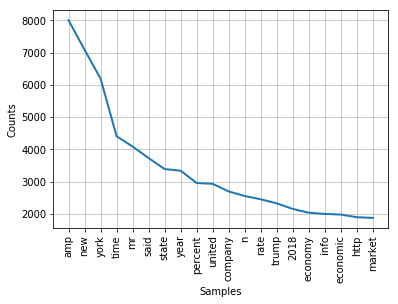

In [14]:
plt = freq.plot(20)

In [15]:
## ngrams 
toks.sort()
#bigram = list(nltk.bigrams(toks))
#bigram[-100:-1]

In [16]:
# tokenize each articles